In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# No missing values in the dataset.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# No duplicate values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())
print()
print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())
print()
print("Categories in'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())
print()
print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())
print()
print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']

Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:  ['standard' 'free/reduced']

Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# In pandas 'O' stands for objects
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# Creating output features
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average score'] = df['total score'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average score'].count()
writing_full = df[df['writing_score'] == 100]['average score'].count()
math_full = df[df['math_score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average score'].count()
math_less_20 = df[df['math_score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


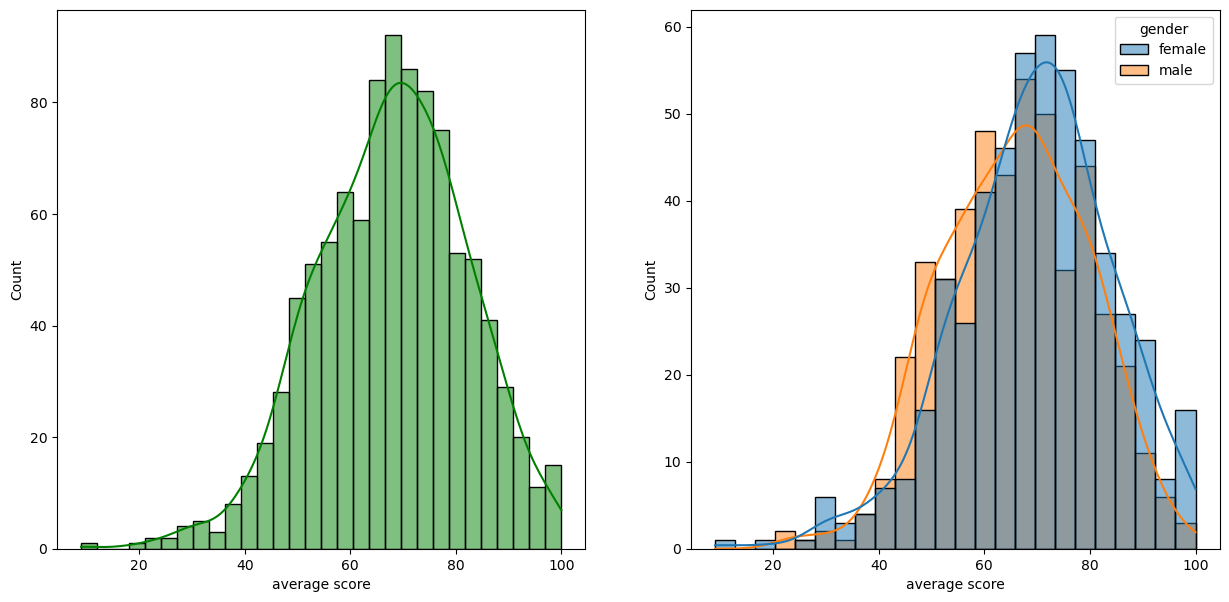

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) # Creates a figure with 2 subplots side by side 
plt.subplot(121) # This line selects the first subplot 121 -> 1 row, 2 columns and we are selecting the first one. 
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g') # Smoothens the curve
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender') # Grey plot shows the average of male and female
plt.show()

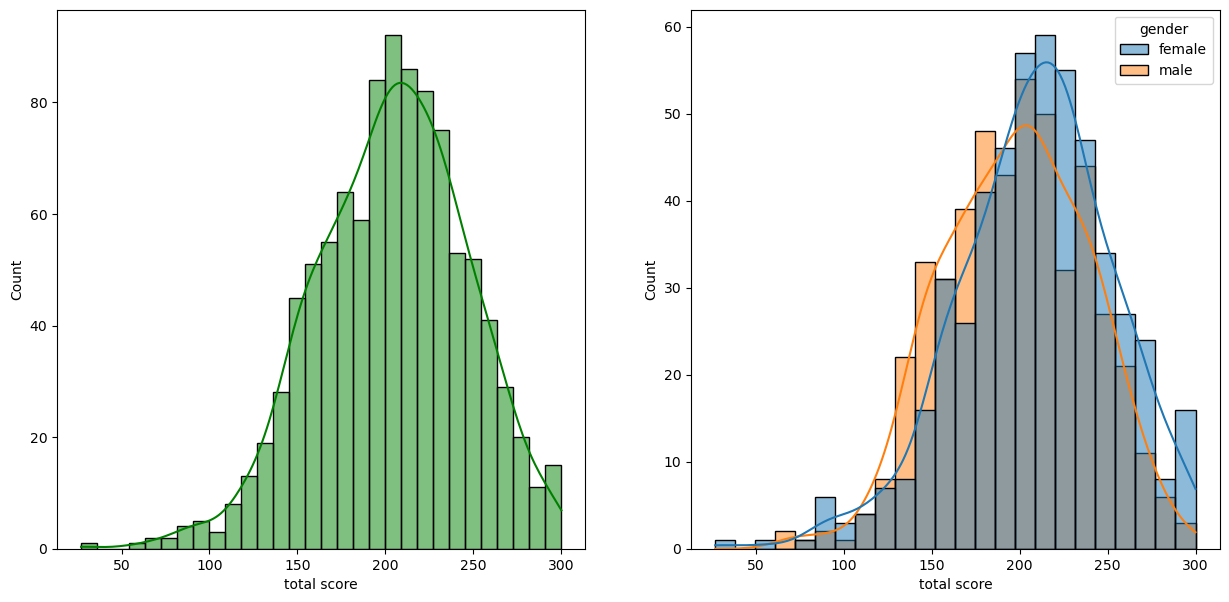

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

In [21]:
# For both average and total scores females tends to perform better than males

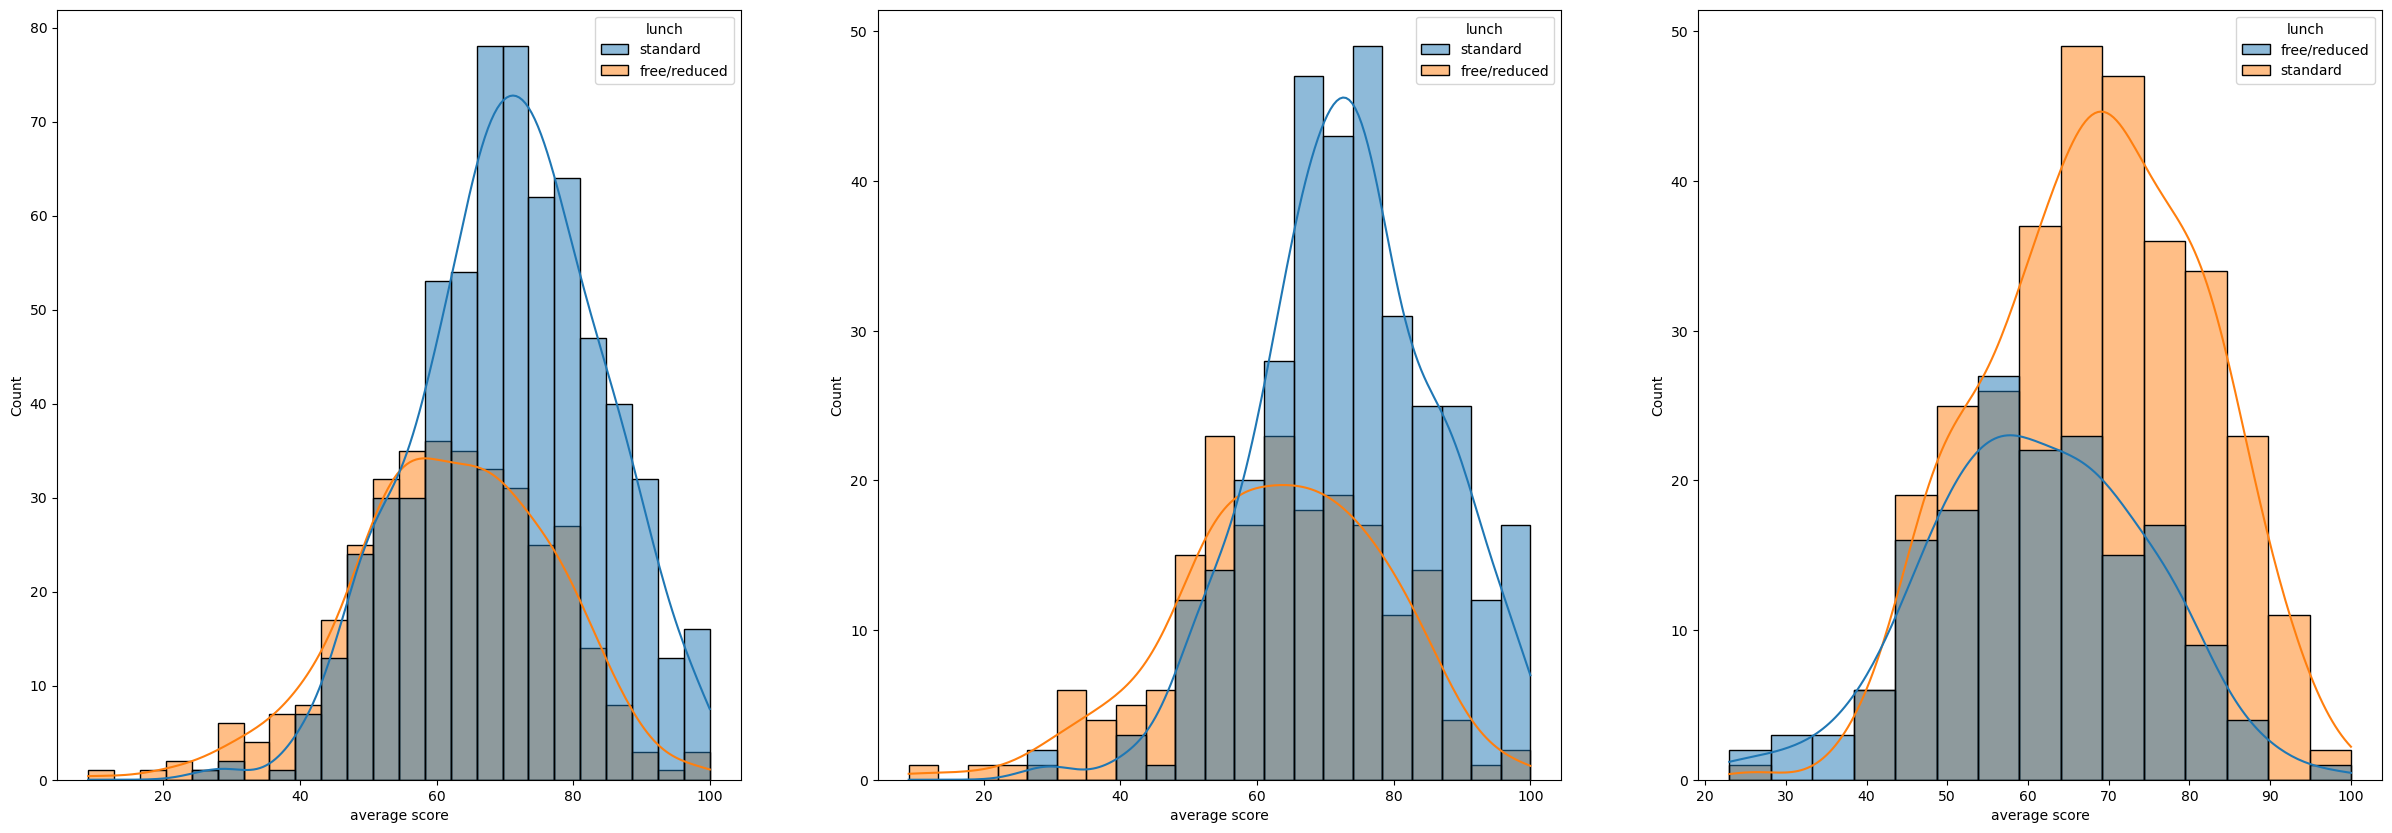

In [22]:
plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

In [23]:
# Standard lunch helps performing well in exams be it male or female

In [25]:
# correlation = df['average score'].corr(df['parental_level_of_education'])
# print(correlation)
print("corr() does not works for string values, Mapping can be done to resolve this")

corr() does not works for string values, Mapping can be done to resolve this


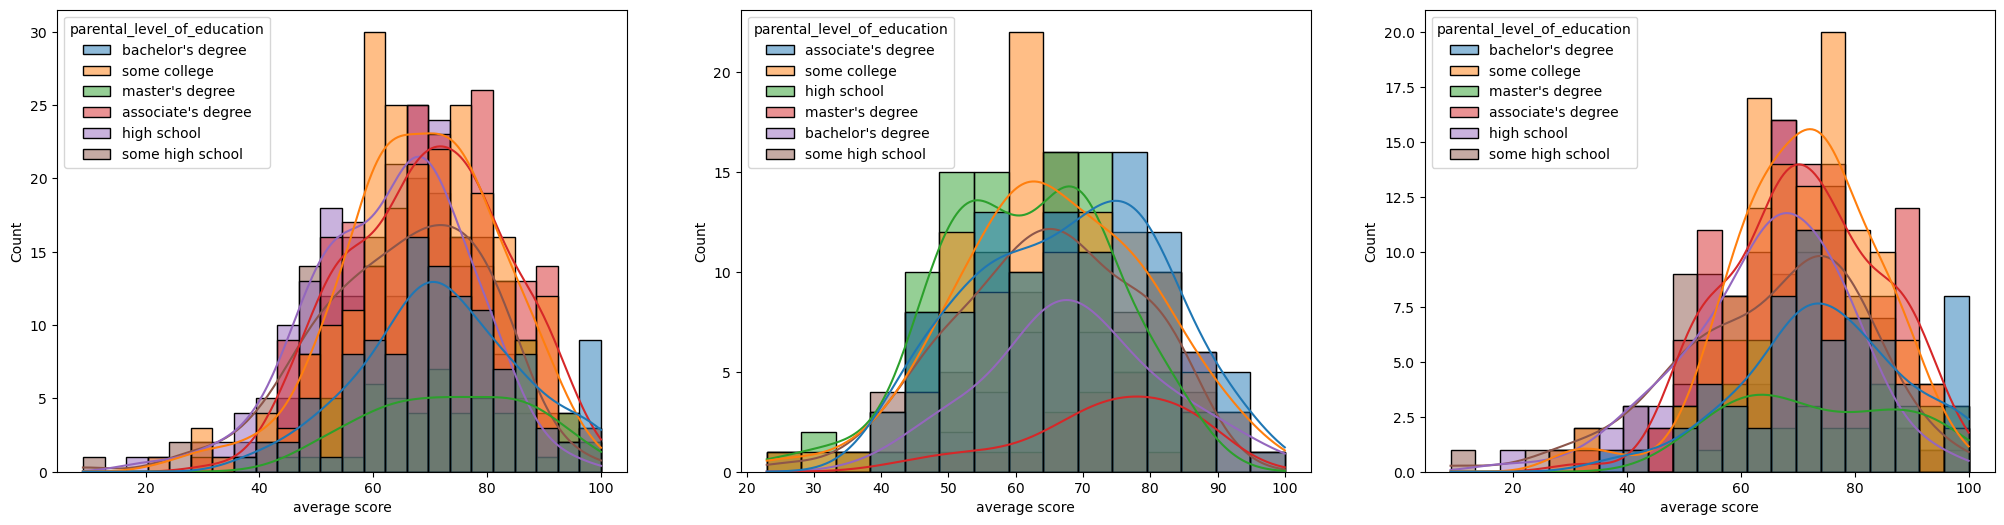

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental_level_of_education')
plt.show()

In [ ]:
# It can be seen that in general the childern of parent's with bachelor's degree score more in exams but this relation is not strong
# Same goes for individual male and female students
# But the education of their parents is not solely responsible for their good performance in exams. 

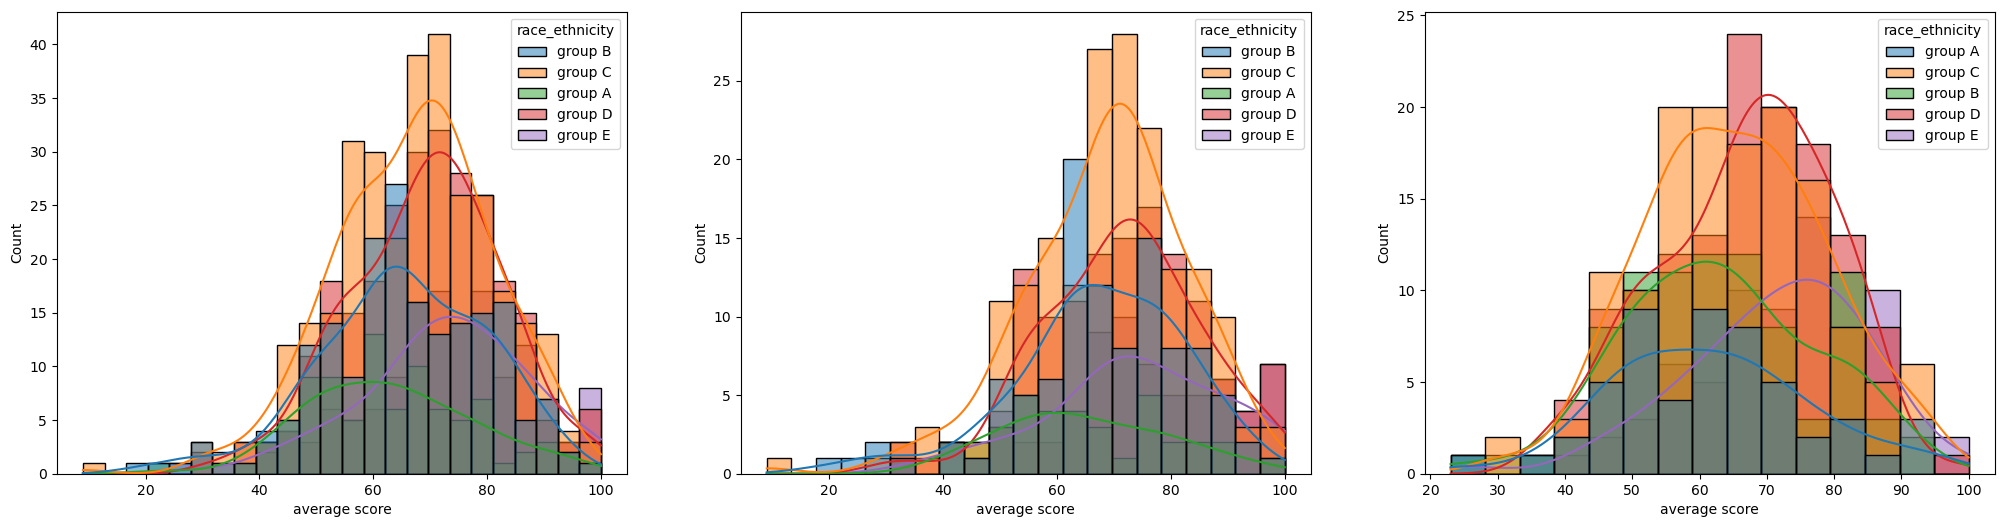

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race_ethnicity')
plt.show()

In [ ]:
# Group D and E tends to perform good in exams in general and for male students also.
# Group D female students tends to perform good in exams.
# Majority of the students belongs to group C and scores average marks in exams.

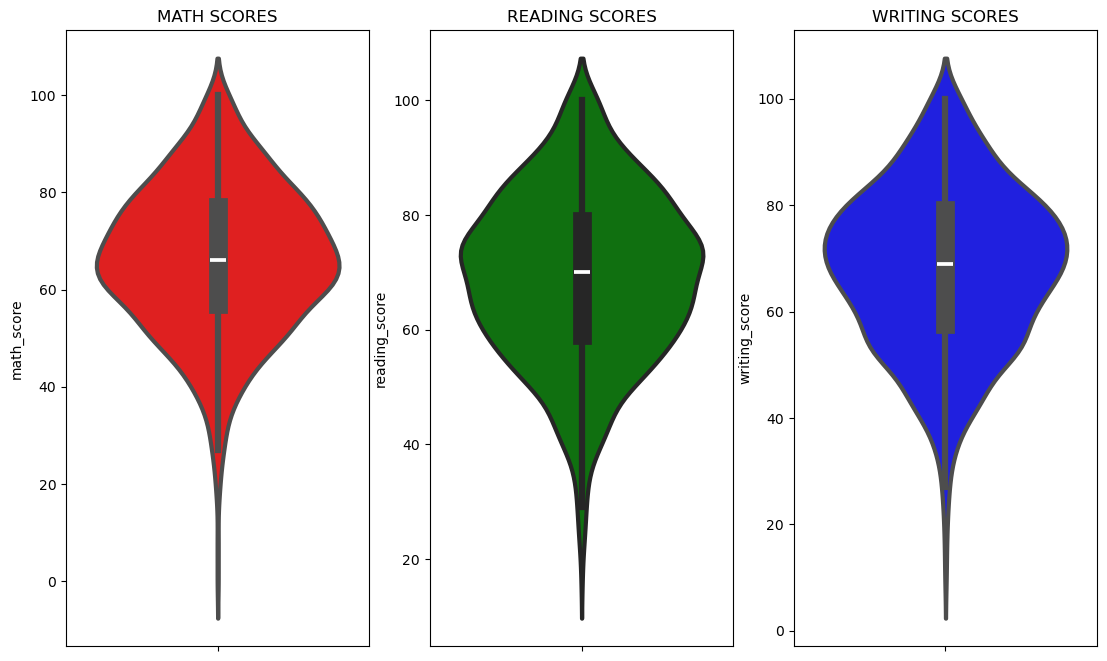

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [ ]:
# From the above three plots its clearly visible that most of the students score in between 60-80 in Maths 
# In reading and writing most of them score from 50-80

## Multivariate Analysis

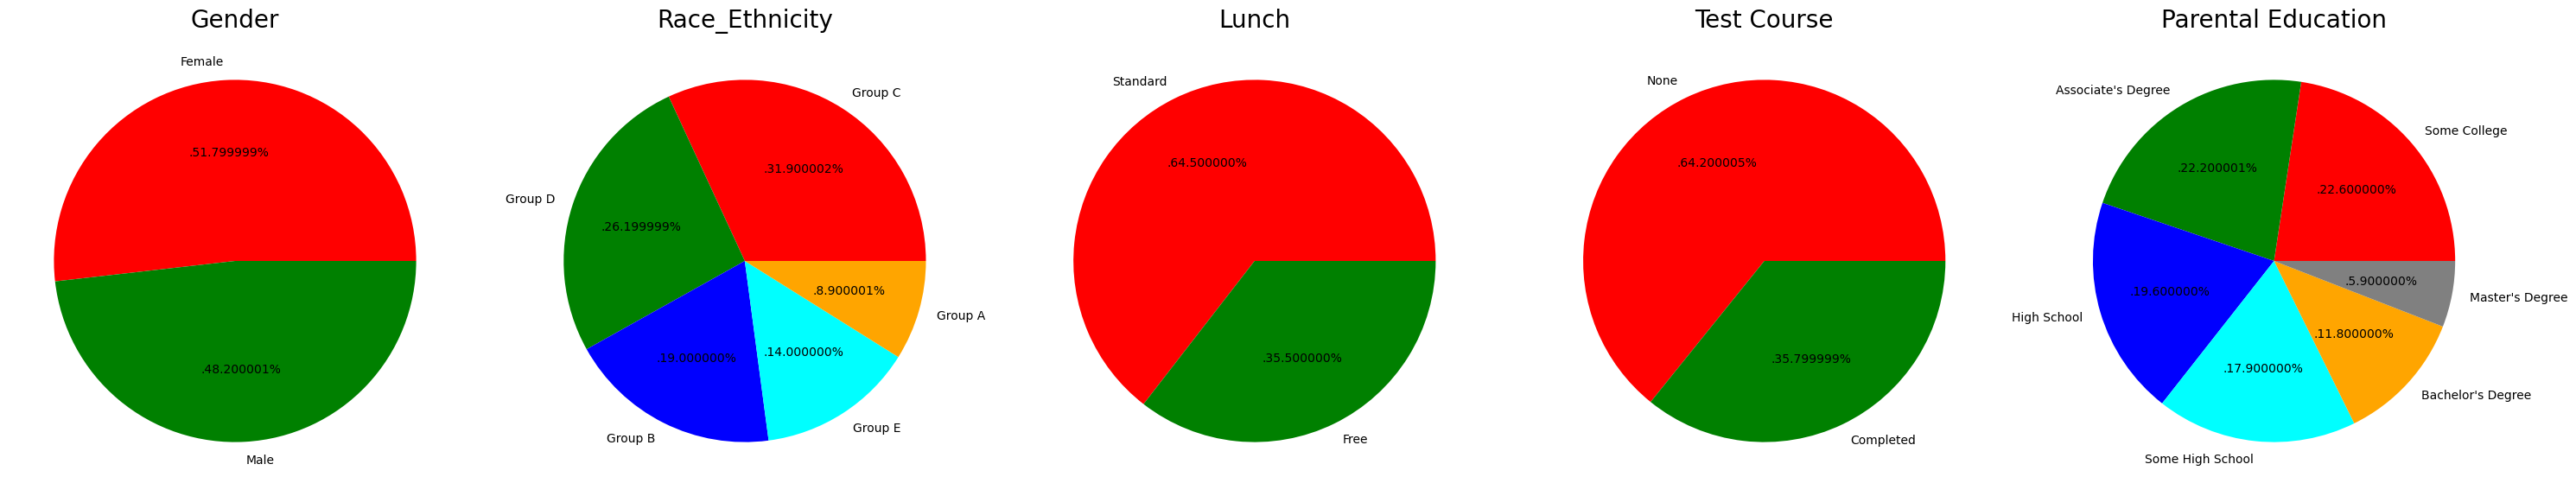

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [ ]:
# No of male and female students are almost equal.
# Number of students are highest in Group C (which scores average marks in exams as obsereved above)
# Approximately 65% of students have standard lunches.
# Only 35% of the students completed the courses for exams.
# Most of the parents have grabbed their education from some college followed by associate's degree.
# Only 5.9% of parents holds master's degree.

## Univariate Analysis

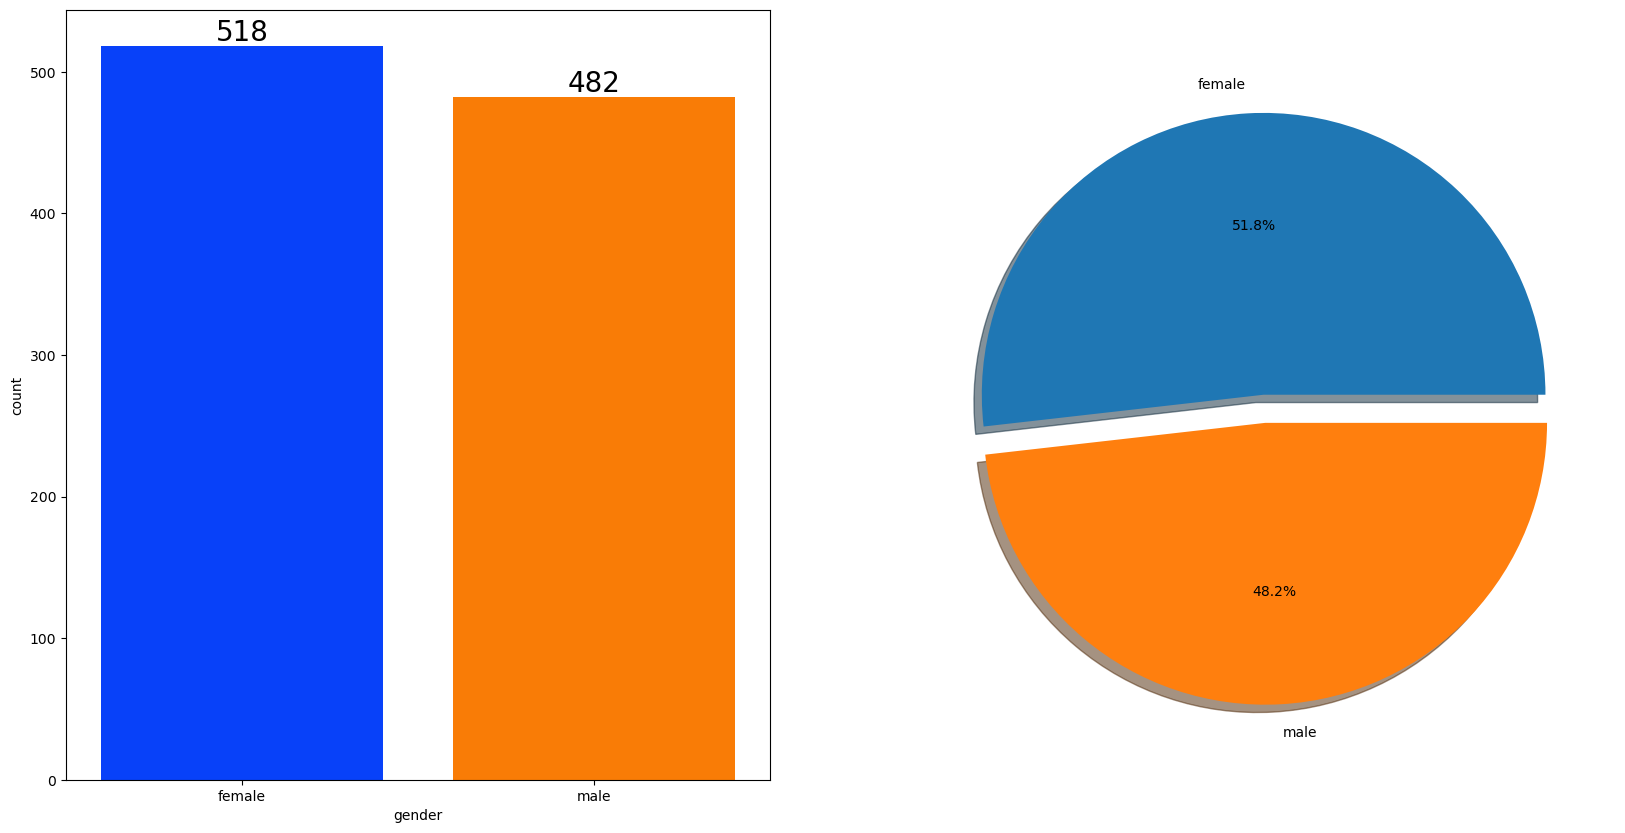

In [35]:
f,ax = plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

counts = df['gender'].value_counts()
plt.subplot(1,2,2)
plt.pie(x=df['gender'].value_counts(),labels=counts.index,explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
# Female -> 518(51.8%), Male -> 482(48.2%)

## Bivariate Analysis

In [37]:
gender_group = df.groupby('gender')[['average score', 'math_score']].mean()
gender_group

,average score,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


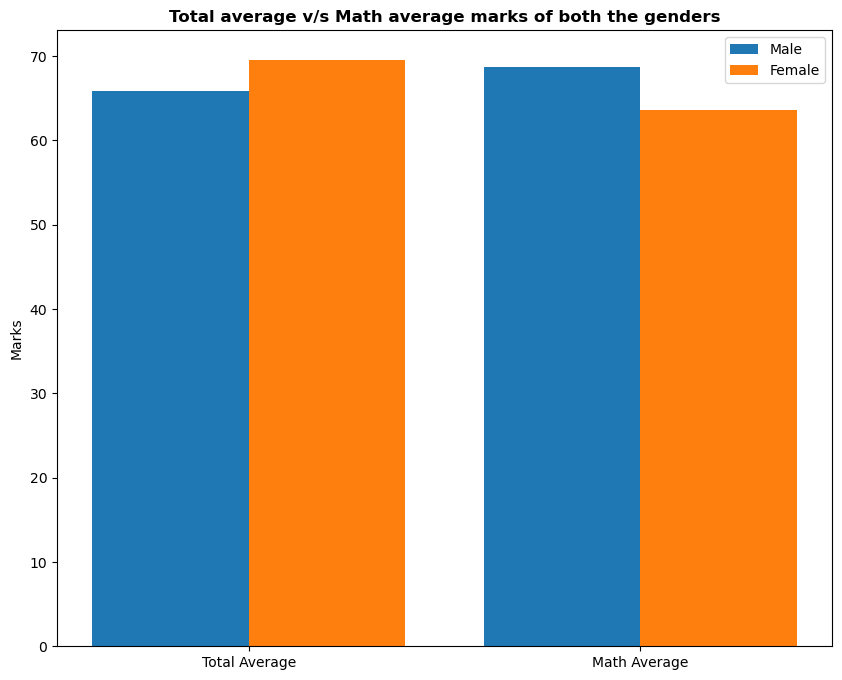

In [43]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group.loc['female', 'average score'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average score'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male') #(-0.2) left shifts the bar, 0.4 is the width of the bar. 
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female') # 0.2 rigth shifts the bar So that both the bars does not overlap. 
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [ ]:
# Overall female students perform well in exams 
# If we see only for maths than male students performs well.

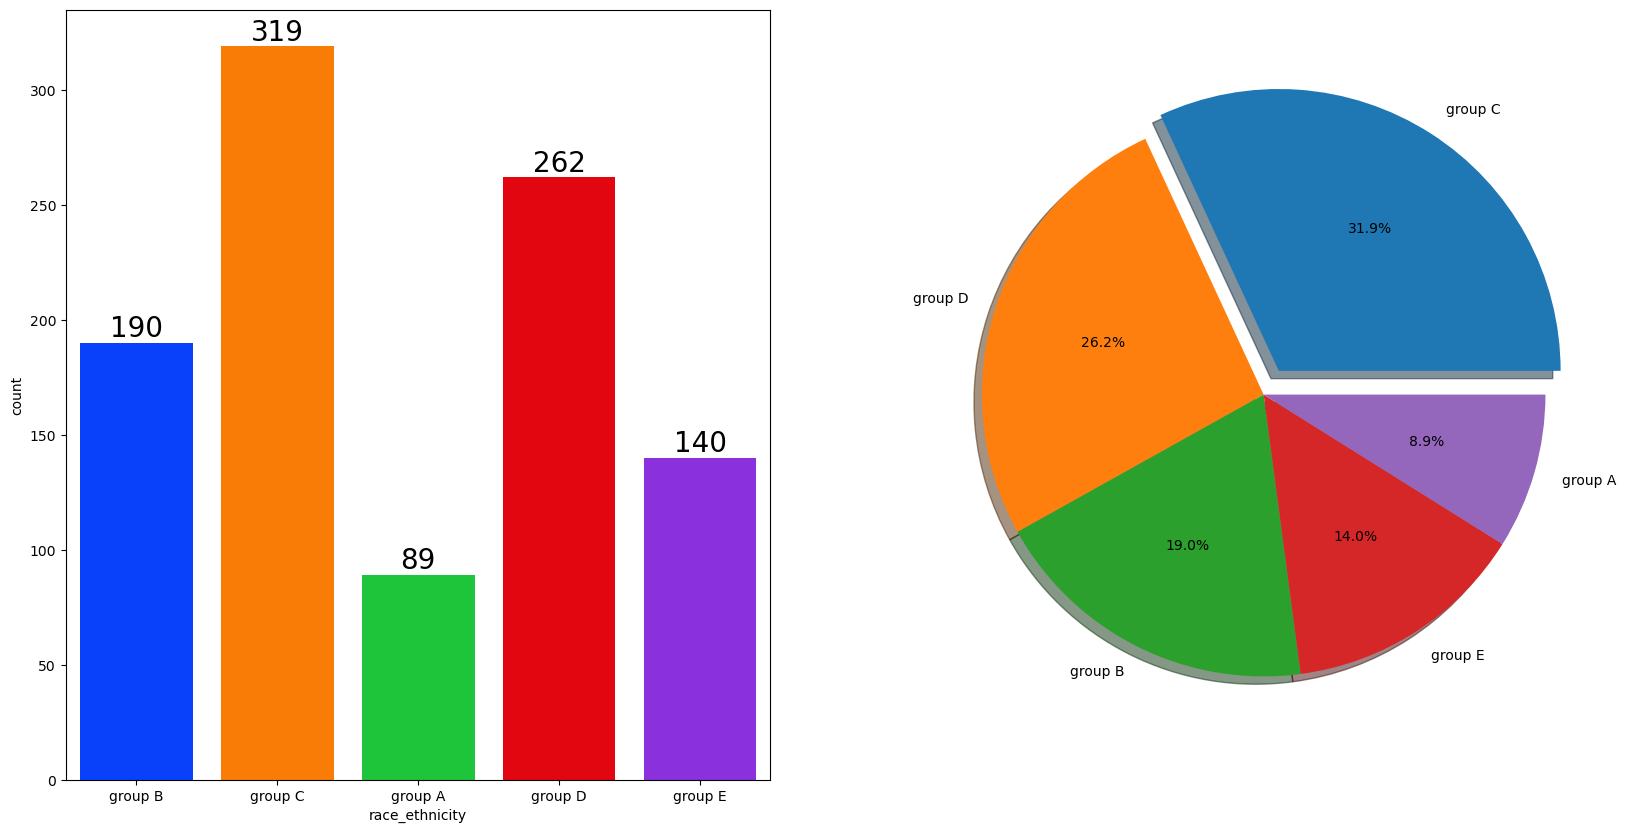

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

In [ ]:
# Maximum number of students belongs to Group C followed by D
# Very less number of students belongs to Group A

<Axes: xlabel='lunch', ylabel='writing_score'>

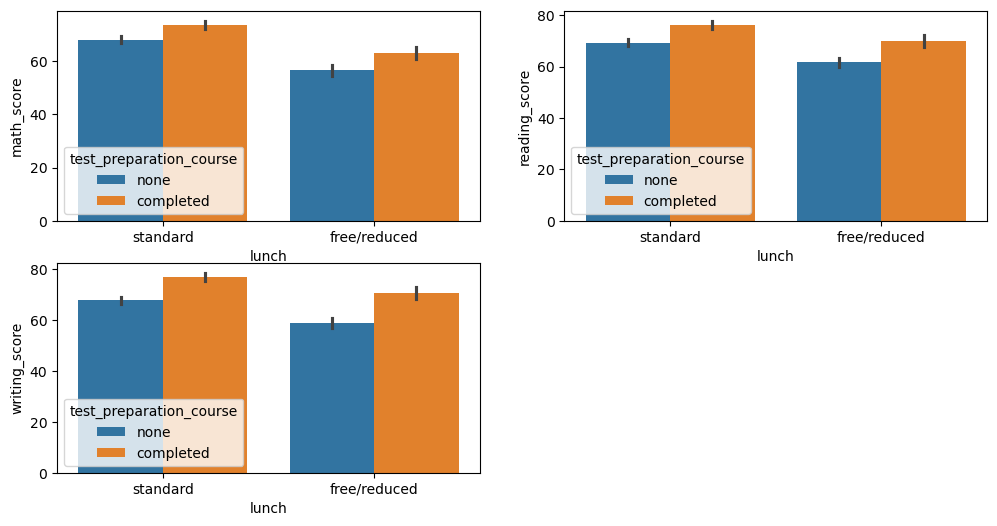

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

In [49]:
# Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## Outliers

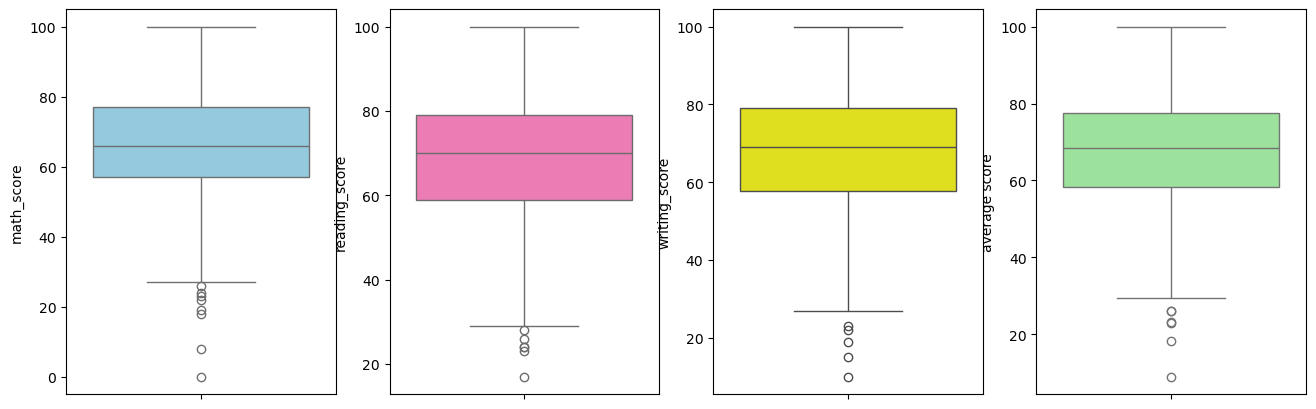

In [52]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

In [53]:
# A very few outliers exists

## Conclusions


    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.
